**This notebook contains the ML Model for predicting flight delay**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import necessary libraries

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
#from matplotlib import pyplot
import numpy as np
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.exceptions import DataConversionWarning

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML Project/Result.csv')

In [ ]:
df

,Unnamed: 0,Unnamed: 0_x,Date (MM/DD/YYYY),Flight Number,Destination Airport,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,icon
0,0,0,2/11/22,1094.0,0,109.0,109.0,29.0,19:06,27.0,...,250.8,1003.8,95.5,14.4,55.9,4.9,5,10.0,0.34,3
1,1,1,2/12/22,1094.0,0,109.0,98.0,59.0,19:25,16.0,...,315.7,1026.2,71.4,15.8,129.5,11.2,7,10.0,0.37,2
2,2,2,2/13/22,1094.0,0,109.0,104.0,-2.0,18:26,18.0,...,298.0,1027.0,69.5,15.8,135.5,11.8,7,10.0,0.40,4
3,3,3,2/14/22,1094.0,0,109.0,99.0,-2.0,18:24,16.0,...,217.7,1027.4,90.2,15.9,67.5,5.8,4,10.0,0.44,4
4,4,4,2/15/22,1094.0,0,109.0,105.0,-3.0,18:36,29.0,...,143.2,1026.5,77.5,15.8,108.5,9.3,6,10.0,0.47,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,1008,1017,10/25/22,2198.0,0,71.0,67.0,-7.0,22:28,15.0,...,158.2,1018.0,100.0,10.5,36.8,3.3,2,10.0,0.00,1
1009,1009,1018,10/26/22,2198.0,0,71.0,67.0,-4.0,22:30,14.0,...,213.4,1011.4,88.2,14.5,74.4,6.4,5,10.0,0.04,3
1010,1010,1019,10/27/22,2198.0,0,71.0,68.0,-6.0,22:31,17.0,...,343.4,1021.1,22.0,16.0,142.5,12.4,6,10.0,0.08,2
1011,1011,1020,10/28/22,2198.0,0,71.0,63.0,-13.0,22:25,18.0,...,30.9,1030.7,62.0,16.0,89.8,7.6,4,10.0,0.11,2


In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'Date (MM/DD/YYYY)', 'Flight Number',
       'Destination Airport', 'Scheduled elapsed time (Minutes)',
       'Actual elapsed time (Minutes)', 'Departure delay (Minutes)',
       'Wheels-off time', 'Taxi-Out time (Minutes)',
       'Delay Carrier (Minutes)_x', 'Delay Weather (Minutes)_x',
       'Delay National Aviation System (Minutes)_x',
       'Delay Security (Minutes)_x', 'Delay Late Aircraft Arrival (Minutes)_x',
       'Origin Airport', 'Arrival Delay (Minutes)', 'Wheels-on Time',
       'Taxi-In time (Minutes)', 'month', 'day', 'year', 'Unnamed: 0_y',
       'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'moonphase', 'icon'],
      dtype='object')

drop unecessary columns

In [ ]:
df=df.drop(columns=['Unnamed: 0', 'Unnamed: 0_x','Unnamed: 0_y'])

Rename the Delay column to Target

In [ ]:
df1 = df.rename(columns={'Arrival Delay (Minutes)':'TARGET'})

In [ ]:
target = pd.cut(df1.TARGET,bins=[-500,-10,10,30,1000],labels=['0','1','2','3'])


In [ ]:
df1.insert(45,'TARGET1',target)

In [ ]:
df1.columns

Index(['Date (MM/DD/YYYY)', 'Flight Number', 'Destination Airport',
       'Scheduled elapsed time (Minutes)', 'Actual elapsed time (Minutes)',
       'Departure delay (Minutes)', 'Wheels-off time',
       'Taxi-Out time (Minutes)', 'Delay Carrier (Minutes)_x',
       'Delay Weather (Minutes)_x',
       'Delay National Aviation System (Minutes)_x',
       'Delay Security (Minutes)_x', 'Delay Late Aircraft Arrival (Minutes)_x',
       'Origin Airport', 'TARGET', 'Wheels-on Time', 'Taxi-In time (Minutes)',
       'month', 'day', 'year', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'moonphase', 'icon', 'TARGET1'],
      dtype='object')

Define Features and Labels for training testing data

In [ ]:
X1=df1[['Origin Airport', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'moonphase',
       'icon', 'day', 'month', 'year', 'Flight Number']]

y = df1['TARGET1']

In [ ]:
X1_train, X1_test, y_train, y_test = train_test_split(X1,y, test_size=0.2, random_state=20)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1_train = pd.DataFrame(sc.fit_transform(X1_train), columns = X1_train.columns, index = X1_train.index)
X1_test = pd.DataFrame(sc.transform(X1_test), columns = X1_test.columns, index = X1_test.index)

In [ ]:
X1_train

,Origin Airport,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarradiation,solarenergy,uvindex,severerisk,moonphase,icon,day,month,year,Flight Number
206,0.982572,0.949510,1.590662,1.272104,1.312042,1.460623,1.322399,1.738199,1.313543,0.255621,...,-1.168265,-1.143073,-1.654083,2.532432,-0.456289,0.825929,-1.011148,0.300500,0.0,-0.470267
893,0.196126,0.780303,1.386212,1.086312,0.786974,1.293867,1.039039,1.347958,0.720380,0.640197,...,-0.998546,-1.032183,-1.315234,0.765365,1.611177,0.825929,1.256376,-0.344282,0.0,1.726915
150,0.982572,0.667498,1.230440,0.959191,0.651473,1.166814,0.922361,1.443139,1.332678,1.045286,...,-0.830196,-0.842085,-1.315234,-0.412679,-0.800867,0.825929,-1.124524,-0.021891,0.0,-1.531749
895,0.196126,0.930709,0.918897,1.017862,0.914007,0.912709,0.980700,1.081452,0.190997,-0.374755,...,-0.530452,-0.509413,1.395554,-0.412679,-1.593395,-0.278035,1.483128,-0.344282,0.0,1.726915
438,-1.376767,-0.723761,-1.008778,-0.849840,-0.601914,-0.961315,-0.852807,-1.041077,-0.746585,-0.374755,...,1.618404,1.629193,0.717857,-0.412679,-0.318458,-0.278035,-0.217514,-1.311454,0.0,-0.254610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,0.196126,1.297325,1.434891,1.409004,1.549169,1.333571,1.439077,1.623982,0.694867,0.503740,...,-0.971172,-0.968817,-1.315234,2.532432,-1.662311,0.825929,1.369752,-0.021891,0.0,1.726915
223,0.982572,0.789703,0.918897,0.900520,0.710755,0.912709,0.864022,0.843501,0.006032,-0.374755,...,-0.227969,-0.240107,1.056705,-0.412679,0.577444,-0.278035,0.009238,0.300500,0.0,0.248123
271,0.982572,0.827305,0.782597,0.841848,0.803912,0.801538,0.830686,1.052898,0.592817,-0.374755,...,-0.572881,-0.588620,0.040160,-0.412679,0.646360,-0.278035,-0.104138,0.622891,0.0,-1.096233
474,-1.376767,0.554693,-0.658292,0.088900,0.549847,-0.572217,0.097283,-1.060113,-1.607629,-0.374755,...,2.037226,2.056914,1.056705,-0.412679,0.439613,-0.278035,0.349367,-0.989063,0.0,-0.477269


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=20).fit(X1_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lr.score(X1_train,y_train)

0.49135802469135803

In [ ]:
lr.score(X1_test,y_test)

0.458128078817734

Feature: 0, Score: 0.52421
Feature: 1, Score: -0.09852
Feature: 2, Score: -0.32440
Feature: 3, Score: -0.27824
Feature: 4, Score: 0.42868
Feature: 5, Score: 0.15797
Feature: 6, Score: 0.23195
Feature: 7, Score: -0.12714
Feature: 8, Score: -0.06830
Feature: 9, Score: -0.05962
Feature: 10, Score: 0.00200
Feature: 11, Score: 0.01525
Feature: 12, Score: 0.13324
Feature: 13, Score: -0.02470
Feature: 14, Score: 0.08387
Feature: 15, Score: -0.07289
Feature: 16, Score: -0.08252
Feature: 17, Score: 0.12474
Feature: 18, Score: 0.16798
Feature: 19, Score: 0.01411
Feature: 20, Score: 0.16845
Feature: 21, Score: -0.02448
Feature: 22, Score: -0.09191
Feature: 23, Score: -0.18352
Feature: 24, Score: -0.01257
Feature: 25, Score: -0.20521
Feature: 26, Score: -0.07247
Feature: 27, Score: 0.12255
Feature: 28, Score: 0.00000
Feature: 29, Score: -0.19707


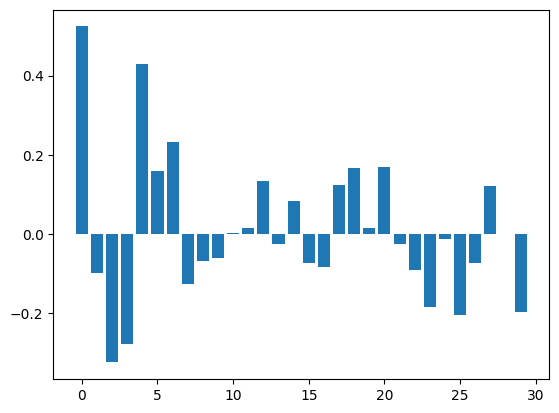

In [ ]:
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
test_output = pd.DataFrame(lr.predict(X1_test), index = X1_test.index, columns = ['pred'])

In [ ]:
test_output

,pred
320,0
346,0
832,1
471,1
935,1
...,...
36,0
137,0
132,0
677,1


In [ ]:
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output

,pred,TARGET1
320,0,0
346,0,2
832,1,1
471,1,1
935,1,3
...,...,...
36,0,1
137,0,1
132,0,0
677,1,1


In [ ]:
y_pred1=lr.predict(X1_test)

In [ ]:
from sklearn.metrics import *

In [ ]:
cm1 = confusion_matrix(y_test, y_pred1)  
print('Classification Report:\n',classification_report(y_test, y_pred1))

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.42      0.43        65
           1       0.48      0.72      0.58        86
           2       0.00      0.00      0.00        25
           3       0.33      0.15      0.21        27

    accuracy                           0.46       203
   macro avg       0.32      0.32      0.30       203
weighted avg       0.39      0.46      0.41       203



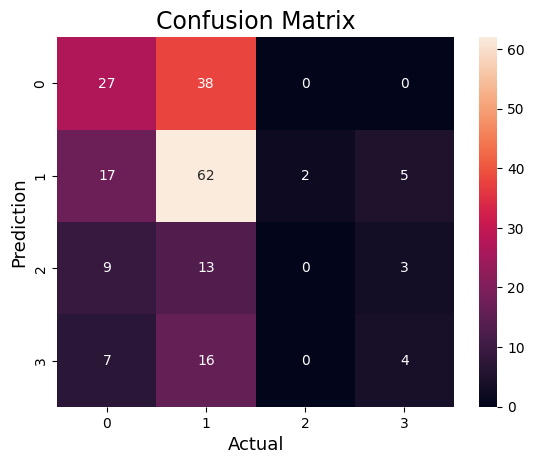

In [ ]:
sns.heatmap(cm1,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
catboost = CatBoostClassifier(random_state=20)
catboost.fit(X1_train, y_train, verbose=False)

In [ ]:
catboost.score(X1_test , y_test)

0.42857142857142855

Text(0.5, 1.0, 'Feature Importance')

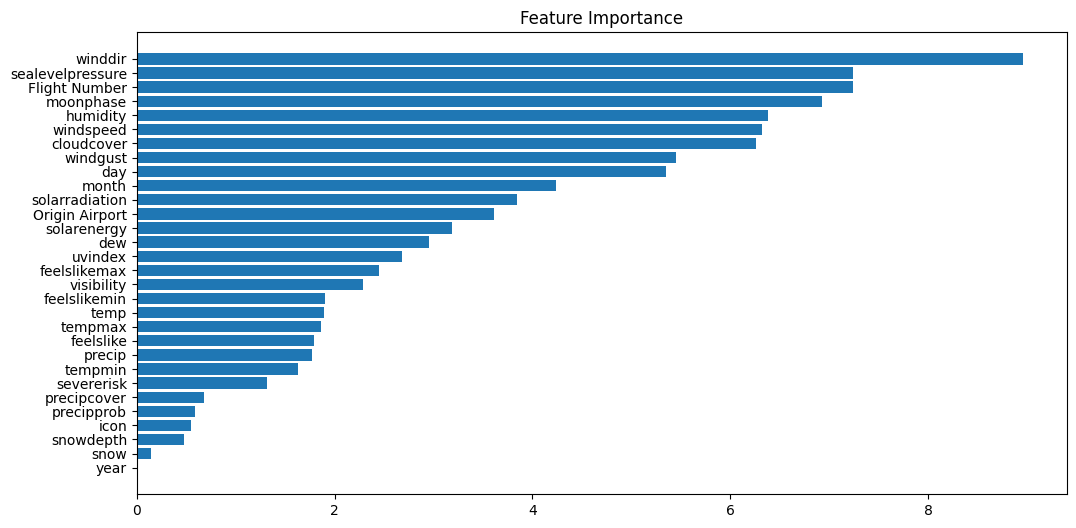

In [ ]:

feature_importance = catboost.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X1_test.columns)[sorted_idx])
plt.title('Feature Importance')


In [ ]:
y_pred2=catboost.predict(X1_test)

In [ ]:
cm2 = confusion_matrix(y_test, y_pred2)  
print('Classification Report:\n',classification_report(y_test, y_pred2))

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.45      0.44        65
           1       0.45      0.58      0.51        86
           2       0.11      0.04      0.06        25
           3       0.41      0.26      0.32        27

    accuracy                           0.43       203
   macro avg       0.35      0.33      0.33       203
weighted avg       0.40      0.43      0.41       203



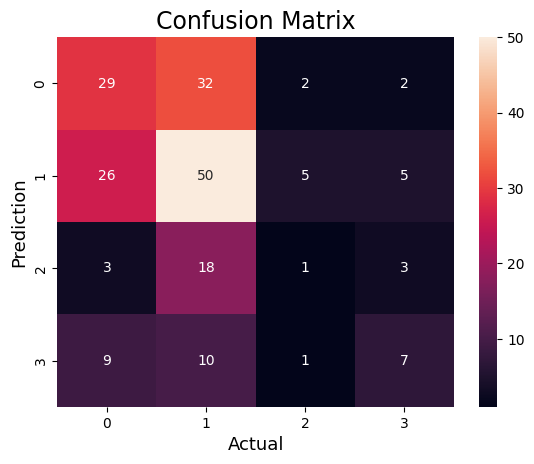

In [ ]:
sns.heatmap(cm2,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X1_train, y_train)

RandomForestClassifier(random_state=10)

In [ ]:
rf.score(X1_test,y_test)

0.43349753694581283

In [ ]:
y_pred3=rf.predict(X1_test)

Text(0.5, 1.0, 'Feature Importance')

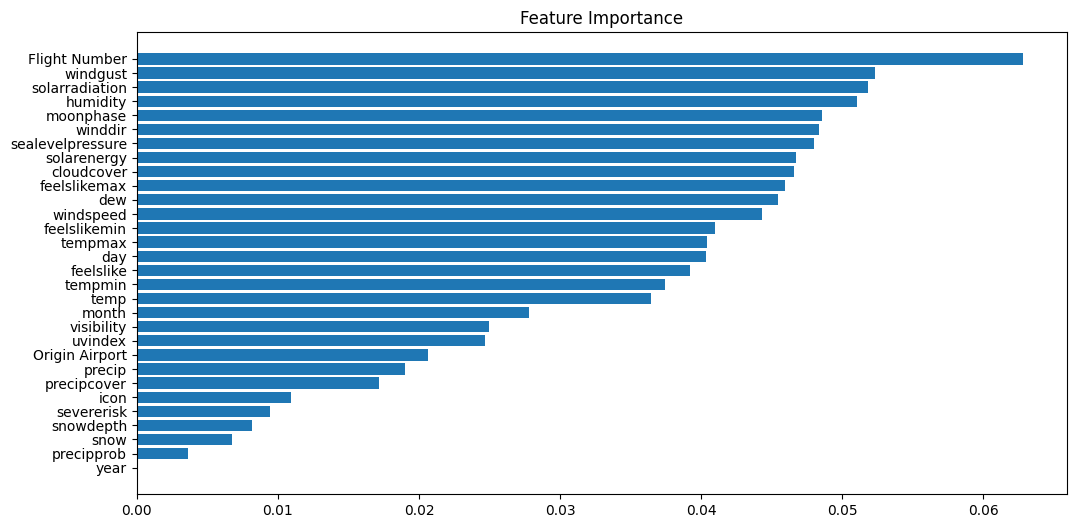

In [ ]:

feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X1_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [ ]:
cm3 = confusion_matrix(y_test, y_pred3)  
print('Classification Report:\n',classification_report(y_test, y_pred3))

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.37      0.39        65
           1       0.46      0.65      0.54        86
           2       0.33      0.12      0.18        25
           3       0.33      0.19      0.24        27

    accuracy                           0.43       203
   macro avg       0.39      0.33      0.34       203
weighted avg       0.41      0.43      0.41       203



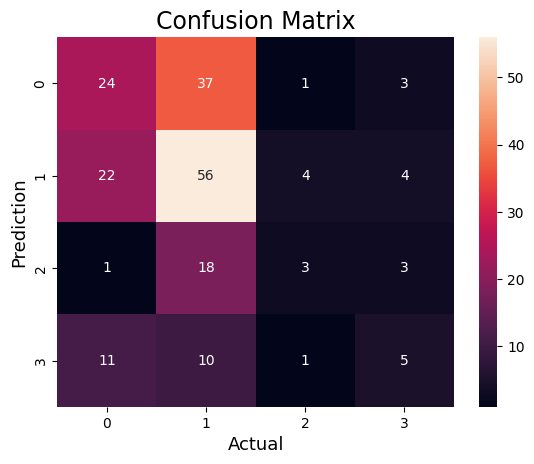

In [ ]:
sns.heatmap(cm3,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
##FORECASTING


In [ ]:
f1=pd.read_csv('/content/drive/MyDrive/ML Project/WeatherDataF21-24.csv')

In [ ]:
f1

,Unnamed: 0,Origin Airport,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,icon,day,month,year
0,0,ORD,16.6,7.1,11.2,16.6,5.4,10.2,2.0,55.1,...,16.0,115.2,10.0,8,10,0.05,partly-cloudy-day,21,4,23
1,1,ORD,8.7,3.9,5.9,6.6,-1.2,2.6,-1.2,60.5,...,15.8,69.4,6.0,3,10,0.08,rain,22,4,23
2,2,ORD,5.7,2.3,4.3,3.7,-1.5,1.2,-2.2,63.2,...,16.0,35.6,2.9,1,10,0.11,cloudy,23,4,23
3,3,ORD,11.8,2.2,7.1,11.8,-0.8,5.2,-3.8,47.6,...,16.0,91.1,7.9,4,10,0.15,partly-cloudy-day,24,4,23
4,0,DEN,8.8,-3.4,2.7,6.2,-7.4,-0.7,-12.5,36.0,...,14.7,127.2,10.8,5,10,0.05,rain,21,4,23
5,1,DEN,1.4,-5.2,-1.7,1.3,-10.3,-5.5,-4.4,82.5,...,9.5,105.5,9.0,4,10,0.08,snow,22,4,23
6,2,DEN,12.6,-3.6,4.3,12.6,-7.3,2.3,-4.8,57.0,...,15.9,295.9,25.5,9,10,0.11,partly-cloudy-day,23,4,23
7,3,DEN,16.5,2.6,9.7,16.5,-0.6,8.6,-4.2,41.7,...,15.9,266.5,23.0,9,10,0.15,partly-cloudy-day,24,4,23
8,0,EWR,20.0,10.7,14.9,20.0,10.7,14.9,8.9,68.2,...,16.0,255.1,22.1,8,10,0.05,partly-cloudy-day,21,4,23
9,1,EWR,20.5,11.6,15.5,20.5,11.6,15.5,11.8,79.3,...,13.4,156.0,13.3,9,10,0.08,rain,22,4,23


In [ ]:
f1['day'] = f1['day'].astype(str)
f1['month'] = f1['month'].astype(str)
f1['year'] = f1['year'].astype(str)

In [ ]:
f1.dtypes

Unnamed: 0            int64
Origin Airport       object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk            int64
moonphase           float64
icon                 object
day                  object
month                object
year                 object
dtype: object

In [ ]:
f2=pd.read_csv('/content/drive/MyDrive/ML Project/project csv(Apr 21-24).csv')

In [ ]:
f2

,Date,Day,Origin Airport,Flight Number,Arrival Time,"Status (Early, On-time, Late, Severly Late)"
0,4/21/23,Friday,ORD,3839,10:00 AM,NaN
1,4/21/23,Friday,ORD,3524,4:50 PM,NaN
2,4/21/23,Friday,ORD,538,9:34 PM,NaN
3,4/22/23,Saturday,ORD,3839,10:00 AM,NaN
4,4/22/23,Saturday,ORD,3524,4:50 PM,NaN
5,4/22/23,Saturday,ORD,538,9:34 PM,NaN
6,4/23/23,Sunday,ORD,3839,10:00 AM,NaN
7,4/23/23,Sunday,ORD,3524,4:55 PM,NaN
8,4/23/23,Sunday,ORD,538,9:34 PM,NaN
9,4/24/23,Monday,ORD,3839,10:00 AM,NaN


In [ ]:
f2[["month", "day", "year"]] = f2["Date"].str.split("/", expand = True)

In [ ]:
f2

,Date,Day,Origin Airport,Flight Number,Arrival Time,"Status (Early, On-time, Late, Severly Late)",month,day,year
0,4/21/23,Friday,ORD,3839,10:00 AM,NaN,4,21,23
1,4/21/23,Friday,ORD,3524,4:50 PM,NaN,4,21,23
2,4/21/23,Friday,ORD,538,9:34 PM,NaN,4,21,23
3,4/22/23,Saturday,ORD,3839,10:00 AM,NaN,4,22,23
4,4/22/23,Saturday,ORD,3524,4:50 PM,NaN,4,22,23
5,4/22/23,Saturday,ORD,538,9:34 PM,NaN,4,22,23
6,4/23/23,Sunday,ORD,3839,10:00 AM,NaN,4,23,23
7,4/23/23,Sunday,ORD,3524,4:55 PM,NaN,4,23,23
8,4/23/23,Sunday,ORD,538,9:34 PM,NaN,4,23,23
9,4/24/23,Monday,ORD,3839,10:00 AM,NaN,4,24,23


In [ ]:
f2.columns

Index(['Date', 'Day', 'Origin Airport', 'Flight Number', 'Arrival Time',
       'Status (Early, On-time, Late, Severly Late)', 'month', 'day', 'year'],
      dtype='object')

drop unnecessary columns

In [ ]:
f2=f2.drop(columns=['Date', 'Day','Arrival Time','Status (Early, On-time, Late, Severly Late)'])

In [ ]:
f2

,Origin Airport,Flight Number,month,day,year
0,ORD,3839,4,21,23
1,ORD,3524,4,21,23
2,ORD,538,4,21,23
3,ORD,3839,4,22,23
4,ORD,3524,4,22,23
5,ORD,538,4,22,23
6,ORD,3839,4,23,23
7,ORD,3524,4,23,23
8,ORD,538,4,23,23
9,ORD,3839,4,24,23


merge the files on origin airport and date

In [ ]:
ff=pd.merge(f1,f2,on=['Origin Airport','day','month','year'])

In [ ]:
ff

,Unnamed: 0,Origin Airport,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarradiation,solarenergy,uvindex,severerisk,moonphase,icon,day,month,year,Flight Number
0,0,ORD,16.6,7.1,11.2,16.6,5.4,10.2,2.0,55.1,...,115.2,10.0,8,10,0.05,partly-cloudy-day,21,4,23,3839
1,0,ORD,16.6,7.1,11.2,16.6,5.4,10.2,2.0,55.1,...,115.2,10.0,8,10,0.05,partly-cloudy-day,21,4,23,3524
2,0,ORD,16.6,7.1,11.2,16.6,5.4,10.2,2.0,55.1,...,115.2,10.0,8,10,0.05,partly-cloudy-day,21,4,23,538
3,1,ORD,8.7,3.9,5.9,6.6,-1.2,2.6,-1.2,60.5,...,69.4,6.0,3,10,0.08,rain,22,4,23,3839
4,1,ORD,8.7,3.9,5.9,6.6,-1.2,2.6,-1.2,60.5,...,69.4,6.0,3,10,0.08,rain,22,4,23,3524
5,1,ORD,8.7,3.9,5.9,6.6,-1.2,2.6,-1.2,60.5,...,69.4,6.0,3,10,0.08,rain,22,4,23,538
6,2,ORD,5.7,2.3,4.3,3.7,-1.5,1.2,-2.2,63.2,...,35.6,2.9,1,10,0.11,cloudy,23,4,23,3839
7,2,ORD,5.7,2.3,4.3,3.7,-1.5,1.2,-2.2,63.2,...,35.6,2.9,1,10,0.11,cloudy,23,4,23,3524
8,2,ORD,5.7,2.3,4.3,3.7,-1.5,1.2,-2.2,63.2,...,35.6,2.9,1,10,0.11,cloudy,23,4,23,538
9,3,ORD,11.8,2.2,7.1,11.8,-0.8,5.2,-3.8,47.6,...,91.1,7.9,4,10,0.15,partly-cloudy-day,24,4,23,3839


perform label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
ff['Origin Airport'] = le.fit_transform(ff['Origin Airport'])
ff['icon'] = le.fit_transform(ff['icon'])

In [ ]:
ff


,Unnamed: 0,Origin Airport,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarradiation,solarenergy,uvindex,severerisk,moonphase,icon,day,month,year,Flight Number
0,0,3,16.6,7.1,11.2,16.6,5.4,10.2,2.0,55.1,...,115.2,10.0,8,10,0.05,1,21,4,23,3839
1,0,3,16.6,7.1,11.2,16.6,5.4,10.2,2.0,55.1,...,115.2,10.0,8,10,0.05,1,21,4,23,3524
2,0,3,16.6,7.1,11.2,16.6,5.4,10.2,2.0,55.1,...,115.2,10.0,8,10,0.05,1,21,4,23,538
3,1,3,8.7,3.9,5.9,6.6,-1.2,2.6,-1.2,60.5,...,69.4,6.0,3,10,0.08,2,22,4,23,3839
4,1,3,8.7,3.9,5.9,6.6,-1.2,2.6,-1.2,60.5,...,69.4,6.0,3,10,0.08,2,22,4,23,3524
5,1,3,8.7,3.9,5.9,6.6,-1.2,2.6,-1.2,60.5,...,69.4,6.0,3,10,0.08,2,22,4,23,538
6,2,3,5.7,2.3,4.3,3.7,-1.5,1.2,-2.2,63.2,...,35.6,2.9,1,10,0.11,0,23,4,23,3839
7,2,3,5.7,2.3,4.3,3.7,-1.5,1.2,-2.2,63.2,...,35.6,2.9,1,10,0.11,0,23,4,23,3524
8,2,3,5.7,2.3,4.3,3.7,-1.5,1.2,-2.2,63.2,...,35.6,2.9,1,10,0.11,0,23,4,23,538
9,3,3,11.8,2.2,7.1,11.8,-0.8,5.2,-3.8,47.6,...,91.1,7.9,4,10,0.15,1,24,4,23,3839


In [ ]:
ff.columns

Index(['Unnamed: 0', 'Origin Airport', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'moonphase',
       'icon', 'day', 'month', 'year', 'Flight Number'],
      dtype='object')

In [ ]:
ff=ff.drop(columns=['Unnamed: 0'])


Fit the data into our pretrained model

In [ ]:
ff=pd.DataFrame(sc.transform(ff),columns=ff.columns)

In [ ]:
ff

,Origin Airport,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarradiation,solarenergy,uvindex,severerisk,moonphase,icon,day,month,year,Flight Number
0,0.982572,-0.263142,-0.181241,-0.272906,-0.186942,-0.119592,-0.211080,-0.232041,-0.121530,-0.374755,...,0.000603,0.013358,0.717857,-0.412679,-1.490022,-1.382000,0.576119,-0.989063,1.0,3.440970
1,0.982572,-0.263142,-0.181241,-0.272906,-0.186942,-0.119592,-0.211080,-0.232041,-0.121530,-0.374755,...,0.000603,0.013358,0.717857,-0.412679,-1.490022,-1.382000,0.576119,-0.989063,1.0,2.999853
2,0.982572,-0.263142,-0.181241,-0.272906,-0.186942,-0.119592,-0.211080,-0.232041,-0.121530,-0.374755,...,0.000603,0.013358,0.717857,-0.412679,-1.490022,-1.382000,0.576119,-0.989063,1.0,-1.181656
3,0.982572,-1.005773,-0.492784,-0.791169,-1.033825,-0.643684,-0.844473,-0.536619,0.222887,-0.215823,...,-0.626260,-0.620303,-0.976386,-0.412679,-1.386649,-0.278035,0.689495,-0.989063,1.0,3.440970
4,0.982572,-1.005773,-0.492784,-0.791169,-1.033825,-0.643684,-0.844473,-0.536619,0.222887,-0.215823,...,-0.626260,-0.620303,-0.976386,-0.412679,-1.386649,-0.278035,0.689495,-0.989063,1.0,2.999853
5,0.982572,-1.005773,-0.492784,-0.791169,-1.033825,-0.643684,-0.844473,-0.536619,0.222887,-0.215823,...,-0.626260,-0.620303,-0.976386,-0.412679,-1.386649,-0.278035,0.689495,-0.989063,1.0,-1.181656
6,0.982572,-1.287785,-0.648556,-0.947626,-1.279421,-0.667506,-0.961151,-0.631800,0.395096,-0.374755,...,-1.088880,-1.111390,-1.654083,-0.412679,-1.283275,-2.485964,0.802871,-0.989063,1.0,3.440970
7,0.982572,-1.287785,-0.648556,-0.947626,-1.279421,-0.667506,-0.961151,-0.631800,0.395096,-0.374755,...,-1.088880,-1.111390,-1.654083,-0.412679,-1.283275,-2.485964,0.802871,-0.989063,1.0,2.999853
8,0.982572,-1.287785,-0.648556,-0.947626,-1.279421,-0.667506,-0.961151,-0.631800,0.395096,-0.374755,...,-1.088880,-1.111390,-1.654083,-0.412679,-1.283275,-2.485964,0.802871,-0.989063,1.0,-1.181656
9,0.982572,-0.714361,-0.658292,-0.673826,-0.593446,-0.611920,-0.627786,-0.784089,-0.599888,-0.374755,...,-0.329253,-0.319314,-0.637537,-0.412679,-1.145444,-1.382000,0.916248,-0.989063,1.0,3.440970


In [ ]:
test1=catboost.predict(ff)

In [ ]:
test1

array([['1'],
       ['1'],
       ['0'],
       ['1'],
       ['1'],
       ['1'],
       ['0'],
       ['0'],
       ['1'],
       ['1'],
       ['1'],
       ['0'],
       ['1'],
       ['3'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['3'],
       ['3'],
       ['1'],
       ['1'],
       ['1'],
       ['1']], dtype=object)

In [ ]:
test2=rf.predict(ff)

In [ ]:
test2

array(['1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1',
       '3', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1'], dtype=object)

In [ ]:
test3=lr.predict(ff)

In [ ]:
test3

array(['1', '1', '0', '3', '1', '0', '1', '0', '0', '0', '0', '0', '1',
       '3', '1', '1', '1', '1', '1', '1', '3', '1', '1', '1', '1', '1',
       '1', '3', '1', '1', '1', '1'], dtype=object)